 Build a Financial Insights Dashboard and Scoring Model

In [1]:
 #importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_excel('family_financial_and_transactions_data.xlsx')
data.head()

Family ID       Member ID Transaction Date    Category  Amount  Income  \
0    FAM001  FAM001_Member1       2024-10-07      Travel  409.12  113810   
1    FAM001  FAM001_Member1       2024-10-16      Travel  270.91  113810   
2    FAM001  FAM001_Member1       2024-10-17   Groceries   91.10  113810   
3    FAM001  FAM001_Member1       2024-10-25  Healthcare  198.23  113810   
4    FAM001  FAM001_Member1       2024-10-25   Education  206.42  113810   

   Savings  Monthly Expenses  Loan Payments  Credit Card Spending  Dependents  \
0    20234              5781           2422                  2959           2   
1    20234              5781           2422                  2959           2   
2    20234              5781           2422                  2959           2   
3    20234              5781           2422                  2959           2   
4    20234              5781           2422                  2959           2   

   Financial Goals Met (%)  
0                       68  
1                       68  
2                       68  
3                       68  
4                       68

In [3]:
# Check for missing values
missing_values = data.isnull().sum()

# Display missing values for each column
print(missing_values)

Family ID                  0
Member ID                  0
Transaction Date           0
Category                   0
Amount                     0
Income                     0
Savings                    0
Monthly Expenses           0
Loan Payments              0
Credit Card Spending       0
Dependents                 0
Financial Goals Met (%)    0
dtype: int64


In [4]:
# prompt: Using dataframe data:  Identify family-level and member-level spending patterns.

import pandas as pd

# Calculate total spending per family
family_spending = data.groupby('Family ID')['Amount'].sum()

# Calculate average spending per family member
member_spending = data.groupby('Member ID')['Amount'].mean()


# Analyze spending patterns by category for each family
family_category_spending = data.groupby(['Family ID', 'Category'])['Amount'].sum().unstack()

# Analyze spending patterns by category for each member
member_category_spending = data.groupby(['Member ID', 'Category'])['Amount'].sum().unstack()

# Display the results (optional)
print("Total Spending per Family:")
print(family_spending)

print("\nAverage Spending per Member:")
print(member_spending)

print("\nFamily-Level Spending by Category:")
print(family_category_spending)

print("\nMember-Level Spending by Category:")
member_category_spending


Total Spending per Family:
Family ID
FAM001    23188.90
FAM002    22309.71
FAM003    11220.34
FAM004    23483.10
FAM005    40246.21
            ...   
FAM196    31433.34
FAM197     4032.82
FAM198    19378.59
FAM199    31009.65
FAM200    24887.93
Name: Amount, Length: 200, dtype: float64

Average Spending per Member:
Member ID
FAM001_Member1    241.525926
FAM001_Member2    244.304483
FAM001_Member3    192.673636
FAM001_Member4    287.056154
FAM002_Member1    256.908333
                     ...    
FAM200_Member2    233.761111
FAM200_Member3    212.333182
FAM200_Member4    233.720000
FAM200_Member5    270.414000
FAM200_Member6    229.716250
Name: Amount, Length: 926, dtype: float64

Family-Level Spending by Category:
Category   Education  Entertainment     Food  Groceries  Healthcare   Travel  \
Family ID                                                                      
FAM001       2251.01        4168.86  4380.92    3410.61     1575.89  4576.81   
FAM002       1547.02        3397.26

Category        Education  Entertainment     Food  Groceries  Healthcare  \
Member ID                                                                  
FAM001_Member1     656.60        1637.63   530.46     531.89     1086.53   
FAM001_Member2     156.57         189.81  2041.37    1470.32      489.36   
FAM001_Member3     874.03         425.61   245.31     276.33         NaN   
FAM001_Member4     563.81        1915.81  1563.78    1132.07         NaN   
FAM002_Member1     758.41         425.89   552.49      39.19     1002.21   
...                   ...            ...      ...        ...         ...   
FAM200_Member2     375.48         217.31   642.95        NaN      321.97   
FAM200_Member3      80.83         605.97   950.19     534.88      938.24   
FAM200_Member4     333.47         619.56   558.71     627.67      438.47   
FAM200_Member5     741.44        1167.10   633.26        NaN      414.64   
FAM200_Member6     325.58         475.34   190.30      79.99         NaN   

Category         Travel  Utilities  
Member ID                           
FAM001_Member1   947.32    1130.77  
FAM001_Member2  1864.03     873.37  
FAM001_Member3   276.37      21.76  
FAM001_Member4  1489.09     798.90  
FAM002_Member1   117.47     187.24  
...                 ...        ...  
FAM200_Member2    90.29     455.85  
FAM200_Member3   331.92    1229.30  
FAM200_Member4   624.36     537.28  
FAM200_Member5  1642.92     808.92  
FAM200_Member6   766.52        NaN  

[926 rows x 7 columns]

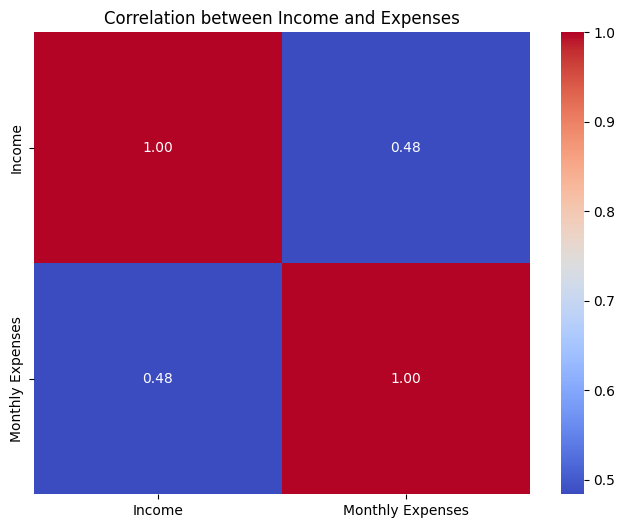

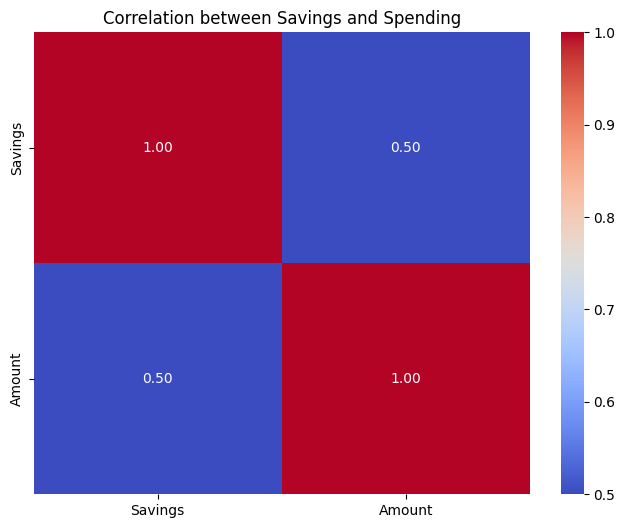

Correlation between income and expenses for each family:
 Family ID
FAM001   NaN
FAM002   NaN
FAM003   NaN
FAM004   NaN
FAM005   NaN
          ..
FAM196   NaN
FAM197   NaN
FAM198   NaN
FAM199   NaN
FAM200   NaN
Name: Monthly Expenses, Length: 200, dtype: float64


In [5]:
# prompt:  Understand correlations between financial metrics (e.g., income vs.
# expenses, savings vs. spending habits).

# Calculate correlations between income and expenses
income_expenses_correlation = data.groupby('Family ID').agg({'Income': 'sum', 'Monthly Expenses': 'sum'}).corr()

# Calculate correlations between savings and spending habits
# Assuming 'Savings' and 'Spending' columns exist; replace with actual column names if different
savings_spending_correlation = data.groupby('Family ID').agg({'Savings': 'sum', 'Amount': 'sum'}).corr()


# Visualize the correlations using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(income_expenses_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Income and Expenses')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(savings_spending_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Savings and Spending')
plt.show()

#Further analysis (example)
#Group data by family and calculate the correlation between income and expenses
family_correlations = data.groupby('Family ID').apply(lambda x: x[['Income', 'Monthly Expenses']].corr())

#Unstack the correlation matrix for better readability
family_correlations = family_correlations.unstack()

#Access specific correlation values
print("Correlation between income and expenses for each family:\n", family_correlations['Income']['Monthly Expenses'])

In [6]:
# Compute overall correlation across all families
overall_correlation = data['Income'].corr(data['Monthly Expenses'])
print("Overall Correlation Between Income and Monthly Expenses:", overall_correlation)

Overall Correlation Between Income and Monthly Expenses: -0.04135483845757862


In [7]:
# Compute member-level correlation (if member-level data exists)
member_data = data.groupby('Member ID')[['Income', 'Monthly Expenses']].mean()
member_correlation = member_data['Income'].corr(member_data['Monthly Expenses'])
print("Member-Level Correlation Between Income and Monthly Expenses:", member_correlation)

Member-Level Correlation Between Income and Monthly Expenses: -0.054492060679574156


Correlation Between Savings-to-Income Ratio and Monthly Expenses: -0.028133290326391416


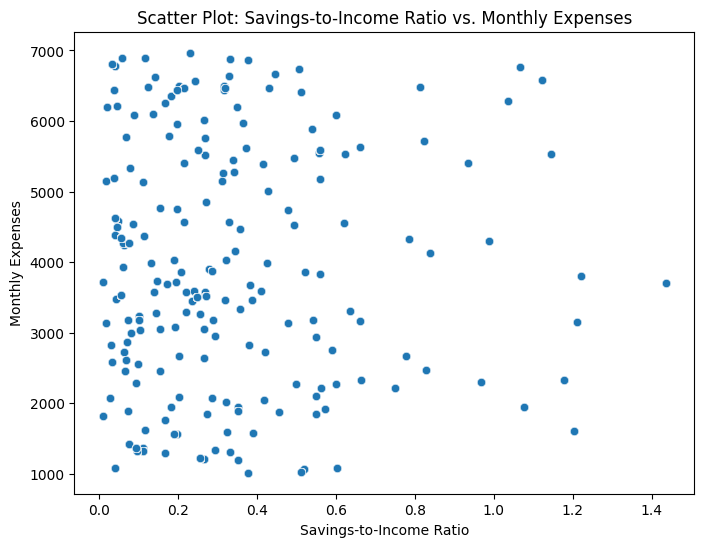

In [8]:
# Compute Savings-to-Income Ratio
data['Savings_to_Income'] = data['Savings'] / data['Income']

# Correlation with Monthly Expenses
savings_expense_corr = data['Savings_to_Income'].corr(data['Monthly Expenses'])
print("Correlation Between Savings-to-Income Ratio and Monthly Expenses:", savings_expense_corr)

# Scatter plot to visualize relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Savings_to_Income', y='Monthly Expenses', data=data, alpha=0.7)
plt.title("Scatter Plot: Savings-to-Income Ratio vs. Monthly Expenses")
plt.xlabel("Savings-to-Income Ratio")
plt.ylabel("Monthly Expenses")
plt.show()


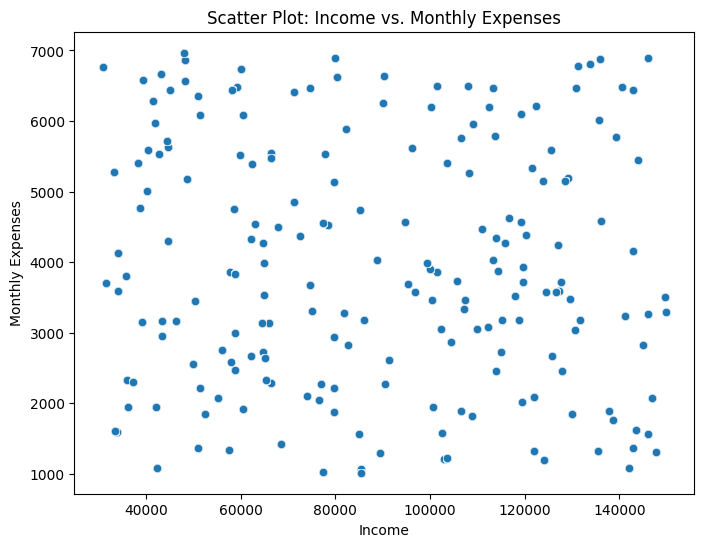

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for overall data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Monthly Expenses', data=data, alpha=0.7)
plt.title("Scatter Plot: Income vs. Monthly Expenses")
plt.xlabel("Income")
plt.ylabel("Monthly Expenses")
plt.show()

In [10]:
# Calculate family-level financial metrics
family_metrics = data.groupby('Family ID').agg({
    'Income': 'mean',  # Family's total income (assuming it's constant)
    'Savings': 'mean',  # Total savings
    'Monthly Expenses': 'mean',  # Monthly expenses
    'Loan Payments': 'mean',  # Total loan payments
    'Financial Goals Met (%)': 'mean',  # Financial goals achieved (%)
    'Amount': 'sum'  # Total spending
}).reset_index()

# Calculate category-wise spending for each family
family_category_spending = data.groupby(['Family ID', 'Category'])['Amount'].sum().unstack(fill_value=0).reset_index()
family_metrics = pd.merge(family_metrics, family_category_spending, on='Family ID', how='left')

# Define scoring function
def calculate_financial_score(row):
    # Weighting factors
    W_SAVINGS_RATIO = 30
    W_EXPENSE_RATIO = 25
    W_LOAN_RATIO = 20
    W_CATEGORY_SPENDING = 15
    W_GOALS_MET = 10

    # Derived ratios
    savings_ratio = row['Savings'] / row['Income'] if row['Income'] > 0 else 0
    expense_ratio = row['Monthly Expenses'] / row['Income'] if row['Income'] > 0 else 0
    loan_ratio = row['Loan Payments'] / row['Income'] if row['Income'] > 0 else 0
    high_risk_spending = row.get('Travel', 0) + row.get('Entertainment', 0)
    high_risk_ratio = high_risk_spending / row['Amount'] if row['Amount'] > 0 else 0
    goals_met_percentage = row['Financial Goals Met (%)'] / 100

    # Scoring
    savings_score = W_SAVINGS_RATIO * savings_ratio
    expense_score = W_EXPENSE_RATIO * (1 - expense_ratio)
    loan_score = W_LOAN_RATIO * (1 - loan_ratio)
    category_score = W_CATEGORY_SPENDING * (1 - high_risk_ratio)
    goals_score = W_GOALS_MET * goals_met_percentage

    # Total financial score
    total_score = savings_score + expense_score + loan_score + category_score + goals_score
    return min(max(total_score, 0), 100)  # Ensure the score is between 0 and 100

# Apply the scoring function to the family metrics
family_metrics['Financial Score'] = family_metrics.apply(calculate_financial_score, axis=1)

# Display results
print("Family-Level Financial Scores:")
print(family_metrics[['Family ID', 'Financial Score']])


Family-Level Financial Scores:
    Family ID  Financial Score
0      FAM001        64.780890
1      FAM002        76.803286
2      FAM003        70.387865
3      FAM004        70.520207
4      FAM005        62.963978
..        ...              ...
195    FAM196        59.651183
196    FAM197        71.037334
197    FAM198        60.064549
198    FAM199        69.672242
199    FAM200        89.954281

[200 rows x 2 columns]


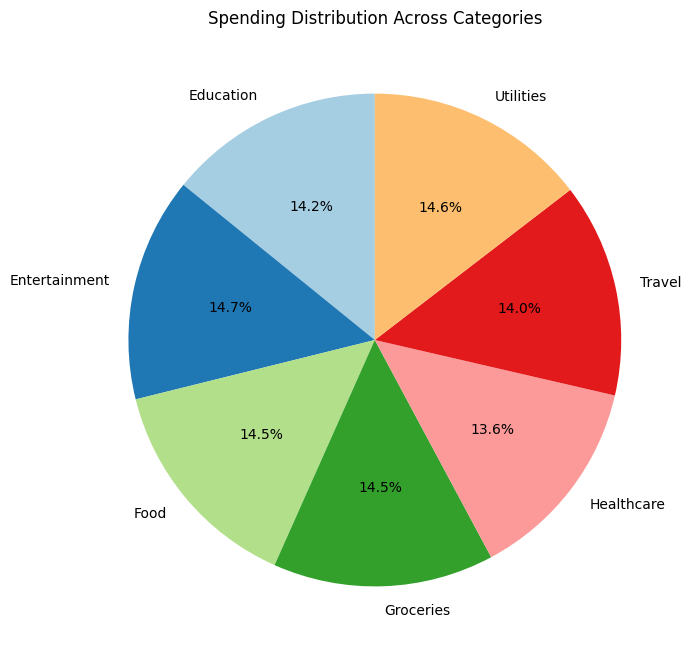

In [11]:
import matplotlib.pyplot as plt

# Plot spending distribution for all families
category_columns = family_category_spending.columns[1:]  # Exclude 'Family ID'
category_totals = family_category_spending[category_columns].sum()

# Pie chart
plt.figure(figsize=(8, 8))
category_totals.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Spending Distribution Across Categories")
plt.ylabel("")  # Hide y-axis label
plt.show()


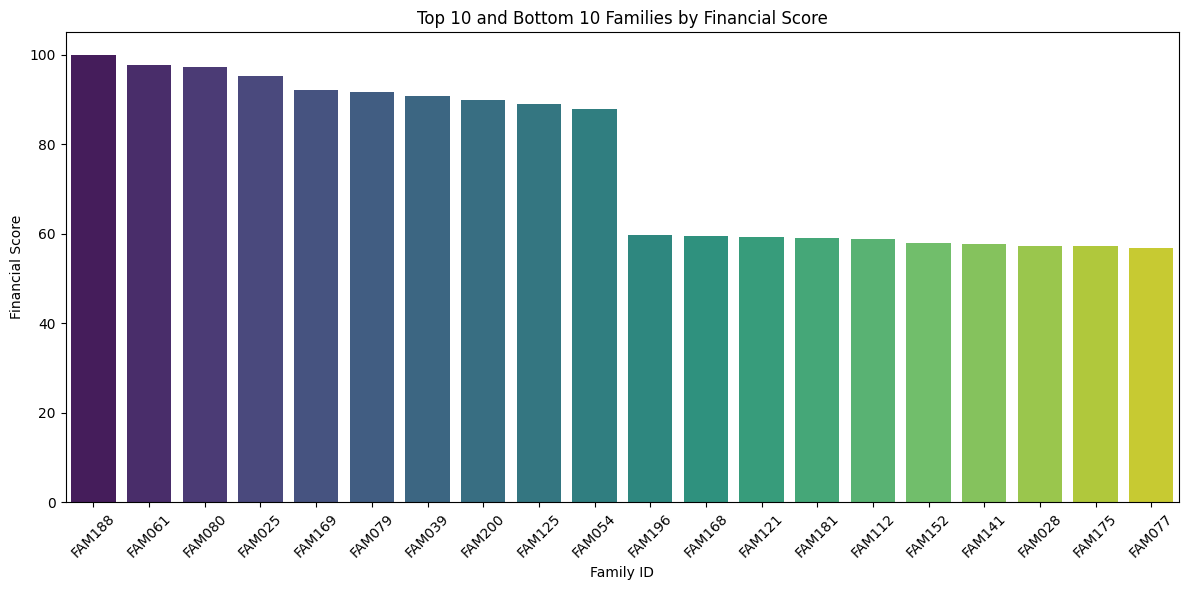

In [12]:
# Sort families by financial score
sorted_family_scores = family_metrics.sort_values(by='Financial Score', ascending=False)

# Plot the top 10 and bottom 10 families by financial score
top_n = 10
top_families = sorted_family_scores.head(top_n)
bottom_families = sorted_family_scores.tail(top_n)

# Concatenate top and bottom families
filtered_families = pd.concat([top_families, bottom_families])

# Bar plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x='Family ID', y='Financial Score', data=filtered_families, palette="viridis")
plt.title(f"Top {top_n} and Bottom {top_n} Families by Financial Score")
plt.xlabel("Family ID")
plt.ylabel("Financial Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

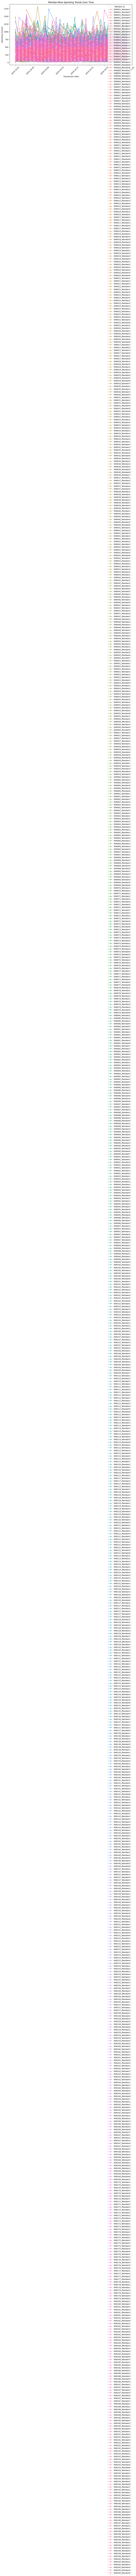

In [13]:
# Aggregate spending by member and date
member_trends = data.groupby(['Member ID', 'Transaction Date'])['Amount'].sum().reset_index()

# Plot spending trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Transaction Date', y='Amount', hue='Member ID', data=member_trends, marker="o")
plt.title("Member-Wise Spending Trends Over Time")
plt.xlabel("Transaction Date")
plt.ylabel("Spending Amount")
plt.xticks(rotation=45)
plt.legend(title="Member ID")
plt.show()

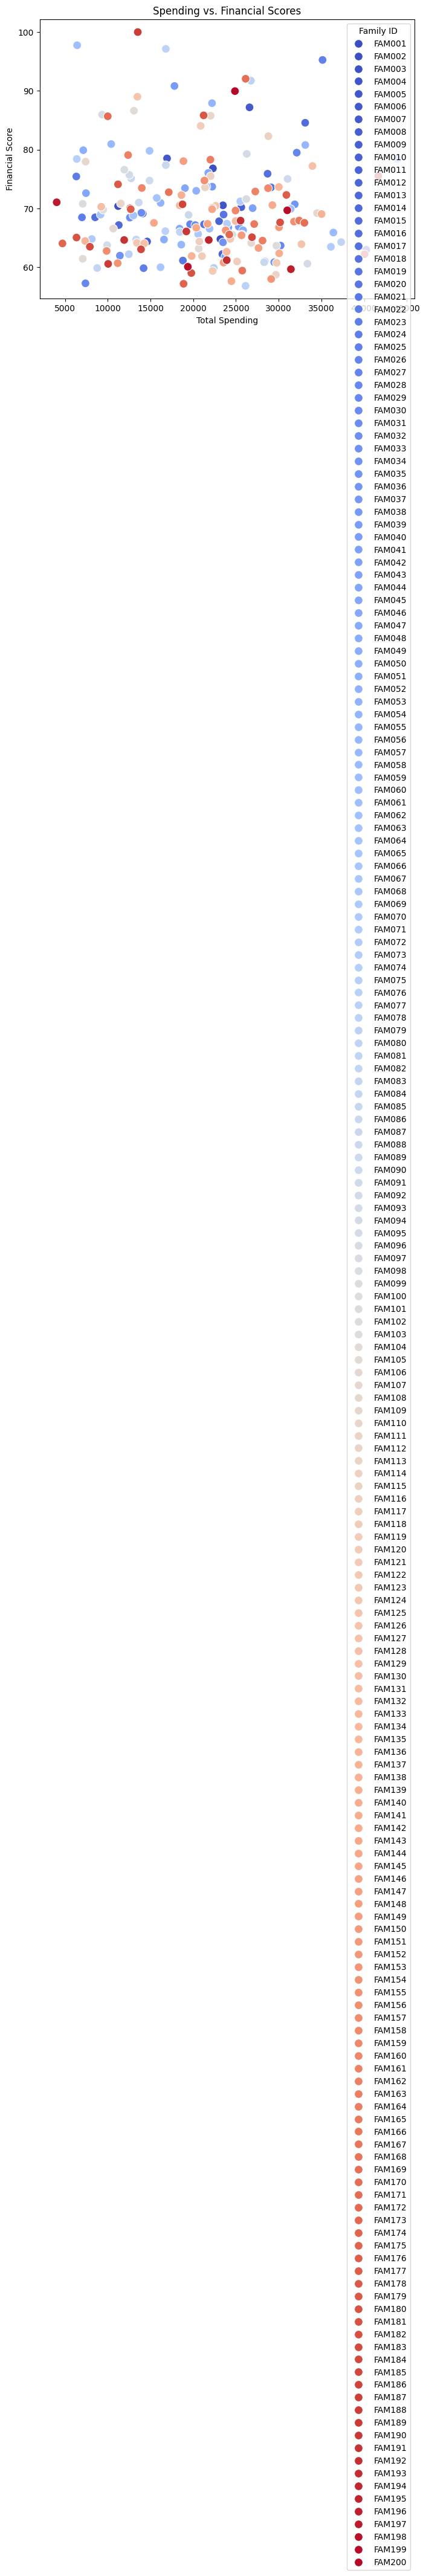

In [14]:
# Scatter plot of total spending vs financial score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Amount', y='Financial Score', data=family_metrics, hue='Family ID', palette="coolwarm", s=100)
plt.title("Spending vs. Financial Scores")
plt.xlabel("Total Spending")
plt.ylabel("Financial Score")
plt.legend(title="Family ID")
plt.show()